## Salary Prediction Exploratory Data Analysis

This notebook help explore the underlying trend/relationship of salary, job types and etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data

In [3]:
#train datassets
train_feature = pd.read_csv('train_features.csv')
train_target = pd.read_csv('train_salaries.csv')
#test data
test_feature = pd.read_csv('test_features.csv')

### Examine the data

In [4]:
display(train_feature.head())

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
display(train_target.head())

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


The train data has 100,0000 rows and 8 features. Only the yearsExperience and milesFromMetropolis are numeric, the rest are categorical

In [34]:
train_feature.degree.unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

In [35]:
train_feature.industry.unique()

array(['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE'],
      dtype=object)

In [36]:
train_feature.major.unique()

array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE', 'BUSINESS', 'ENGINEERING'], dtype=object)

### Check for duplicates

In [7]:
train_feature.duplicated().sum()

0

In [8]:
train_feature.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

In [9]:
train_target.duplicated().sum()

0

In [10]:
train_target.isnull().any()

jobId     False
salary    False
dtype: bool

In [11]:
test_feature.duplicated().sum()

0

### Generate the description for categorical and numeric variables

In [12]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [13]:
train_feature.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [14]:
train_target.describe(include = [np.number])

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [15]:
train_feature.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684476093,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Merge the salary with the train features

In [86]:
train = pd.merge(train_feature, train_target, on = 'jobId')

## visualize the salary variable

/Users/zhijuncai/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


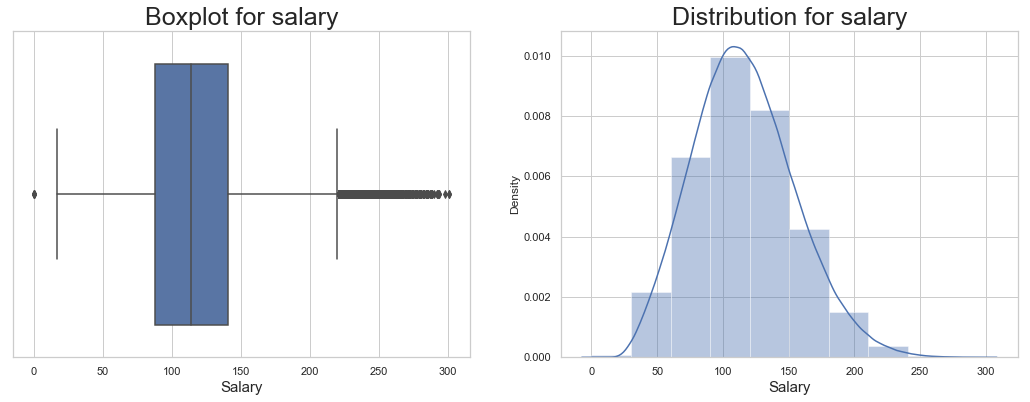

In [21]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = train.salary)
ax.axes.set_title('Boxplot for salary', fontsize = 25)
ax.set_xlabel('Salary', fontsize = 15)
plt.subplot(1,2,2)
ax = sns.distplot(train.salary, bins = 10)
ax.axes.set_title('Distribution for salary', fontsize = 25)
ax.set_xlabel('Salary', fontsize = 15)
plt.show()

### Find the outliers using IQR

In [26]:
q1, q2, q3 = np.percentile(train.salary, q = [25, 50, 75])

In [28]:
IQR = q3 - q1
upper = q3 + 1.5 * IQR
lower = q1 - 1.5* IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))


The upper and lower bounds for suspected outliers are 220.5 and 8.5.


### Let's look at these outliers

In [87]:
train[train.salary<lower]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [30]:
train.loc[train.salary>upper, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

People who has a high salary but a Junior job level are suspicious.

In [31]:
train[(train.salary>upper)&(train.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


After examination, these might be legitimate data because those people with a high eduaction degree and many years of experience.

In [88]:
# Remove those whose salaries are zero
train = train[train.salary>lower]

### Education Degree, Industry, Major, & Job Type

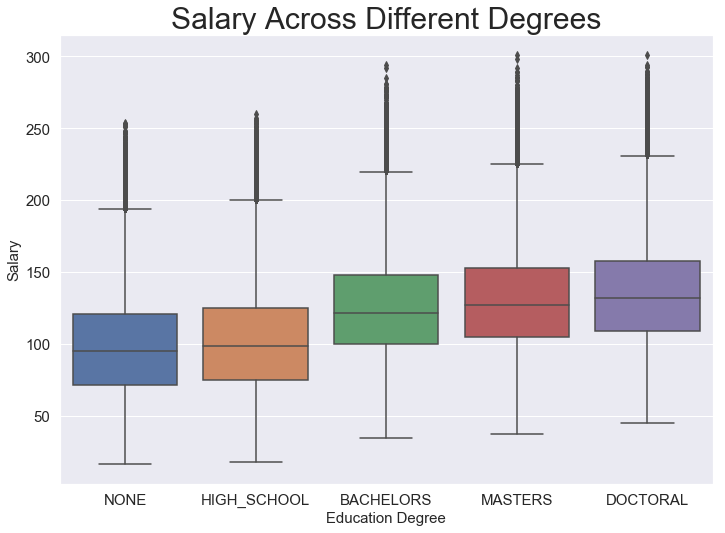

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d = sns.boxplot(x = 'degree', y = 'salary', data = train,
           order = ['NONE','HIGH_SCHOOL','BACHELORS','MASTERS','DOCTORAL'])
d.axes.set_title('Salary Across Different Degrees', fontsize = 30)
d.set_xlabel('Education Degree', fontsize = 15)
d.set_ylabel('Salary', fontsize = 15)
d.tick_params(labelsize = 15)


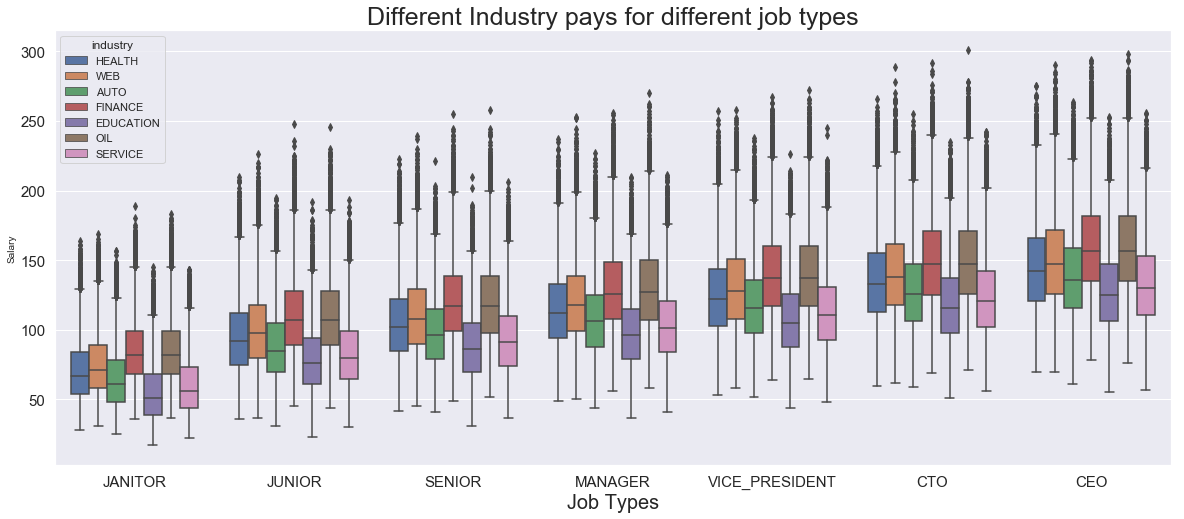

In [66]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = 'jobType', y = 'salary', hue = 'industry',
            order = ["JANITOR", "JUNIOR", 
                     "SENIOR", "MANAGER", "VICE_PRESIDENT",
                     "CTO", "CEO"], data = train)
ax.set_title('Different Industry pays for different job types', fontsize = 25)
ax.set_xlabel('Job Types', fontsize = 20)
ax.set_ylabel('Salary', fontsize = 10)
ax.tick_params(labelsize = 15)

**Oil and Finance Industry pays more for the sam job type.**

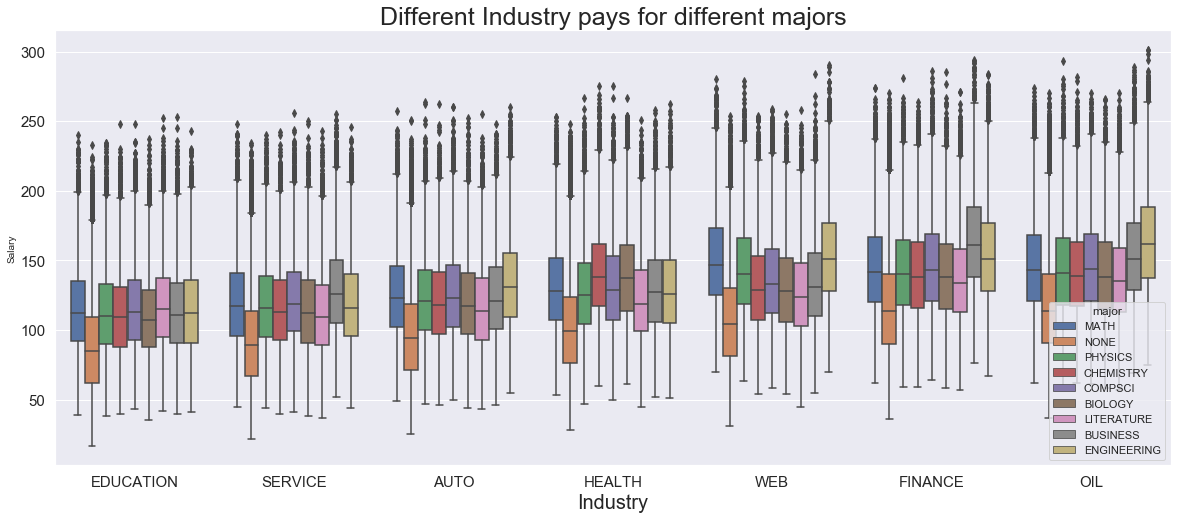

In [65]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = 'industry', y = 'salary', hue = 'major',
            order = ['EDUCATION','SERVICE','AUTO','HEALTH','WEB','FINANCE','OIL'], data = train)
ax.set_title('Different Industry pays for different majors', fontsize = 25)
ax.set_xlabel('Industry', fontsize = 20)
ax.set_ylabel('Salary', fontsize = 10)
ax.tick_params(labelsize = 15)


**Web, Finance and Oil industry give a higher salary to engineering major and business major students.**

In [67]:
train.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


### Relationship between years of experience and salary

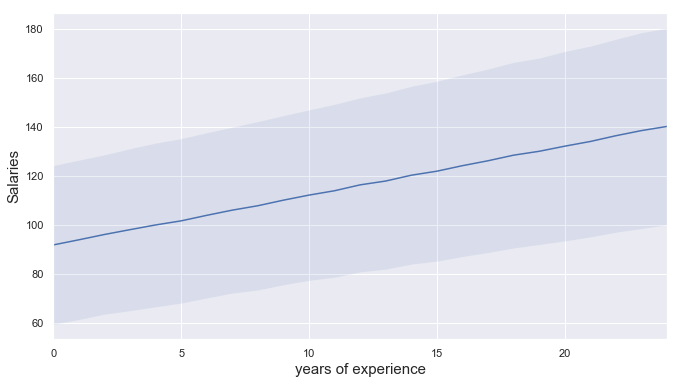

In [80]:
mean = train.groupby('yearsExperience')['salary'].mean()
std = train.groupby('yearsExperience')['salary'].std()
plt.figure(figsize = (11, 6))
mean.plot()
plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
plt.xlabel('years of experience', size = 15)
plt.ylabel('Salaries', size = 15)
plt.show()

**There is a positive correlation between years of experience and salaries.**

### Relationship between Miles From Metropolis and salary

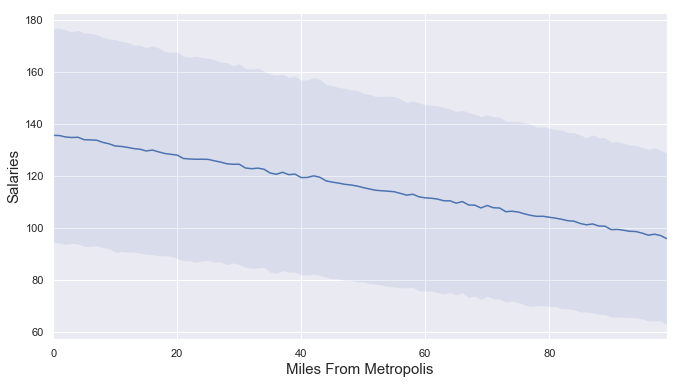

In [81]:
mean = train.groupby('milesFromMetropolis')['salary'].mean()
std = train.groupby('milesFromMetropolis')['salary'].std()
plt.figure(figsize = (11, 6))
mean.plot()
plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
plt.xlabel('Miles From Metropolis', size = 15)
plt.ylabel('Salaries', size = 15)
plt.show()

**It shows a negative correlation between Miles From Metropolis and Salaries. It implies urban areas offer higher salaries than rural area.**

### Linear Regression

In [96]:
y = train['salary']
X = train.loc[:,train.columns != 'salary']